# KAN

By Alberto Valdés.

**Mail 1:** anvaldes@uc.cl

**Mail 2:** alberto.valdes.gonzalez.96@gmail.com

### 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.layers import Dense
from tfkan.layers import DenseKAN

from keras.optimizers import Adam
from keras.models import Sequential
from matplotlib import pyplot as plt
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

### 2. Creation of data

In [2]:
X = [(i*0.1 - 20) for i in range(1, 400 + 1)]

In [3]:
y = [x**2 for x in X]

In [4]:
df = pd.DataFrame({'X': X, 'y': y})

In [5]:
df['X'] = df['X'].astype('float32')
df['y'] = df['y'].astype('float32')

In [6]:
X = df[['X']].copy()
y = df['y'].copy()

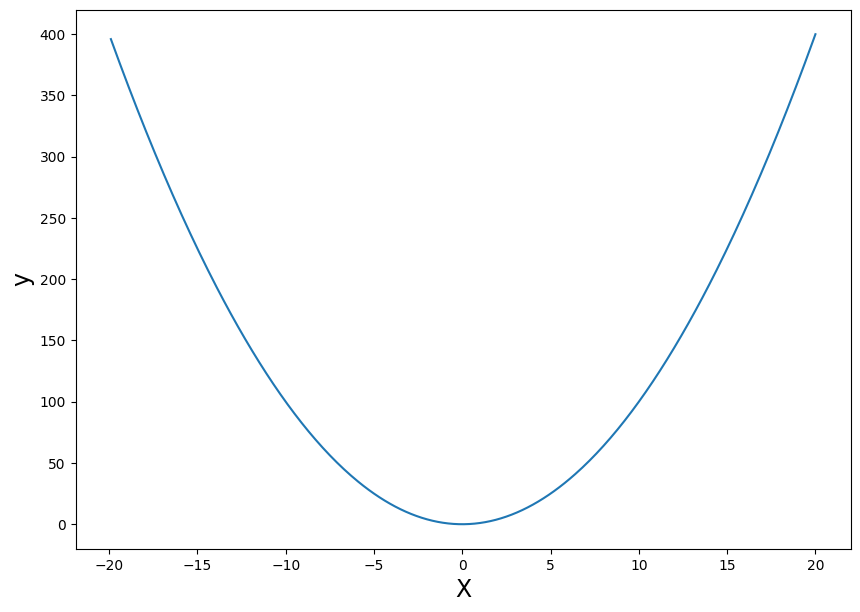

In [7]:
plt.figure(figsize = (10, 7))
plt.xlabel('X', fontsize = 17)
plt.ylabel('y', fontsize = 17)
plt.plot(X, y)
plt.show()

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.5, random_state = 42)

In [9]:
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size = 0.5, random_state = 42)

In [10]:
X_train_mean = X_train.mean()
X_train_std = X_train.std()

X_train = (X_train - X_train_mean)/X_train_std
X_val = (X_val - X_train_mean)/X_train_std
X_test = (X_test - X_train_mean)/X_train_std

In [11]:
y_train_mean = y_train.mean()
y_train_std = y_train.std()

y_train = (y_train - y_train_mean)/y_train_std
y_val = (y_val - y_train_mean)/y_train_std
y_test = (y_test - y_train_mean)/y_train_std

In [12]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_val = np.array(X_val)
y_val = np.array(y_val)

X_test = np.array(X_test)
y_test = np.array(y_test)

### 3. Creation of model

In [13]:
def model_keras(input_size, hidden_dim_1, hidden_dim_2, output_size):

  model = Sequential()
  model.add(DenseKAN(hidden_dim_1, input_shape = (input_size,)))
  model.add(DenseKAN(hidden_dim_2))
  model.add(DenseKAN(output_size))

  return model

### 4. Training

In [14]:
lr = 0.01
n_epochs = 50

input_size = 1
hidden_dim_1 = 10
hidden_dim_2 = 10
output_size = 1

In [15]:
all_epochs = [e for e in range(1, n_epochs + 1)]

In [16]:
model = model_keras(1, 10, 10, 1)

In [17]:
model.compile(optimizer = Adam(learning_rate = lr), loss = 'mse')

In [18]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = n_epochs)

Epoch 1/50
7/7 [==============================] - 5s 118ms/step - loss: 0.8889 - val_loss: 0.8262
Epoch 2/50
7/7 [==============================] - 0s 11ms/step - loss: 0.6435 - val_loss: 0.6944
Epoch 3/50
7/7 [==============================] - 0s 11ms/step - loss: 0.4764 - val_loss: 0.4583
Epoch 4/50
7/7 [==============================] - 0s 11ms/step - loss: 0.2687 - val_loss: 0.2885
Epoch 5/50
7/7 [==============================] - 0s 11ms/step - loss: 0.1498 - val_loss: 0.2142
Epoch 6/50
7/7 [==============================] - 0s 11ms/step - loss: 0.1120 - val_loss: 0.1784
Epoch 7/50
7/7 [==============================] - 0s 11ms/step - loss: 0.0947 - val_loss: 0.1437
Epoch 8/50
7/7 [==============================] - 0s 11ms/step - loss: 0.0822 - val_loss: 0.1205
Epoch 9/50
7/7 [==============================] - 0s 11ms/step - loss: 0.0700 - val_loss: 0.1030
Epoch 10/50
7/7 [==============================] - 0s 11ms/step - loss: 0.0607 - val_loss: 0.0964
Epoch 11/50
7/7 [===========

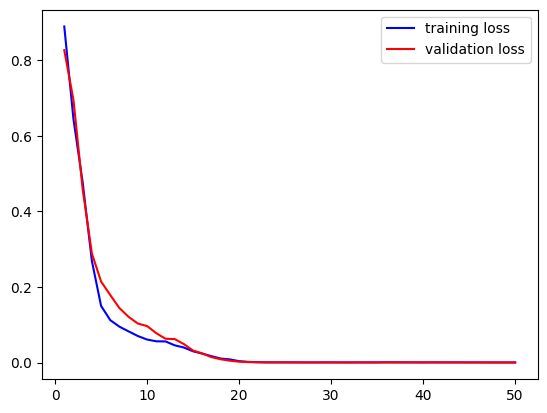

In [19]:
plt.plot(all_epochs, history.history['loss'], label = 'training loss', color = 'blue')
plt.plot(all_epochs, history.history['val_loss'], label = 'validation loss', color = 'red')
plt.legend()
plt.show()

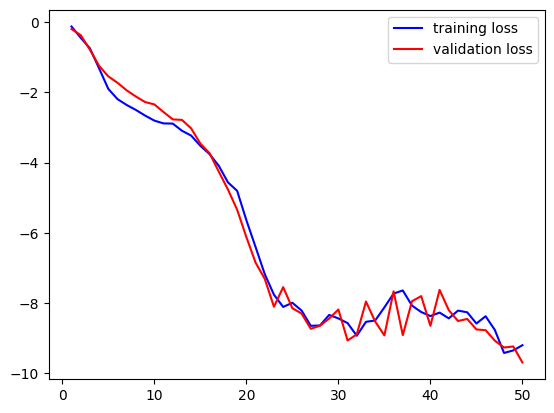

In [20]:
plt.plot(np.array(all_epochs), np.log(np.array(history.history['loss'])), label = 'training loss', color = 'blue')
plt.plot(np.array(all_epochs), np.log(np.array(history.history['val_loss'])), label = 'validation loss', color = 'red')
plt.legend()
plt.show()

### 5. Plot

In [21]:
y_pred_train = (model(X_train)[:, 0]).numpy()
y_pred_val = (model(X_val)[:, 0]).numpy()
y_pred_test = (model(X_test)[:, 0]).numpy()

In [22]:
y_pred_train = y_pred_train*y_train_std + y_train_mean
y_pred_val = y_pred_val*y_train_std + y_train_mean
y_pred_test = y_pred_test*y_train_std + y_train_mean

In [23]:
X_train = (X_train[:, 0]*X_train_std['X'] + X_train_mean['X'])
X_val = (X_val[:, 0]*X_train_std['X'] + X_train_mean['X'])
X_test = (X_test[:, 0]*X_train_std['X'] + X_train_mean['X'])

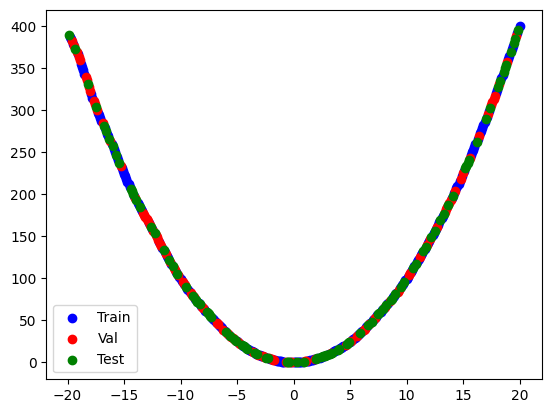

In [24]:
plt.scatter(X_train, y_pred_train, color = 'blue', label = 'Train')
plt.scatter(X_val, y_pred_val, color = 'red', label = 'Val')
plt.scatter(X_test, y_pred_test, color = 'green', label = 'Test')
plt.legend()
plt.show()